### Импорты

In [1]:
import logging
from random import uniform
from typing import Any, Generator

import matplotlib.pyplot as plt
import numpy as np

In [2]:
logger = logging.getLogger()
logger.setLevel(10)

### Пункт 1
Изобразить в первом квадранте координатной плоскости свои инициалы (первые буквы имени и фамилии), использовать графики параболы и эллипса
(окружности).

Буква "В"

In [3]:
letter_1_upper_x_line = np.array([1])
letter_1_upper_y_line = np.array([3])

letter_1_lower_x_line = np.array([1])
letter_1_lower_y_line = np.array([1])

letter_1_line_x = np.append(letter_1_lower_x_line, letter_1_upper_x_line)
letter_1_line_y = np.append(letter_1_lower_y_line, letter_1_upper_y_line)

letter_1_t = np.linspace(start=-np.pi / 2, stop=np.pi / 2)

letter_1_ellipse_x = 1 + 0.5 * np.cos(letter_1_t)
letter_1_lower_ellipse_y = 1.5 + 0.5 * np.sin(letter_1_t)
letter_1_upper_ellipse_y = 2.5 + 0.5 * np.sin(letter_1_t)

Буква "К"

In [4]:
letter_2_upper_x_line = np.array([2])
letter_2_upper_y_line = np.array([3])

letter_2_upper_x_parabola = np.linspace(start=2, stop=3)
letter_2_upper_y_parabola = 2 + (letter_2_upper_x_parabola - 2) ** 2

letter_2_upper_x = np.append(letter_2_upper_x_line, letter_2_upper_x_parabola)
letter_2_upper_y = np.append(letter_2_upper_y_line, letter_2_upper_y_parabola)

letter_2_lower_x_line = np.array([2])
letter_2_lower_y_line = np.array([1])

letter_2_lower_x_parabola = np.linspace(start=2, stop=3)
letter_2_lower_y_parabola = 2 - (letter_2_lower_x_parabola - 2) ** 2

letter_2_lower_x = np.append(letter_2_lower_x_line, letter_2_lower_x_parabola)
letter_2_lower_y = np.append(letter_2_lower_y_line, letter_2_lower_y_parabola)

Вывод

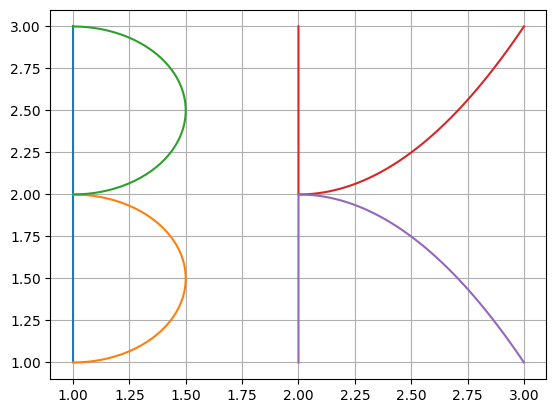

In [5]:
plt.grid()

plt.plot(letter_1_line_x, letter_1_line_y)
plt.plot(letter_1_ellipse_x, letter_1_lower_ellipse_y)
plt.plot(letter_1_ellipse_x, letter_1_upper_ellipse_y)

plt.plot(letter_2_upper_x, letter_2_upper_y)
plt.plot(letter_2_lower_x, letter_2_lower_y)

### Пункт 2
Методом градиентного спуска с шагом h = 0.001
найти минимум функции двух переменных, стартуя
из трех разных точек и выбрав нужное число шагов.
Показать последовательные приближения на рисунке.

In [6]:
def grad_opt(f, grad_f, x, y, step, iter) -> tuple[np.ndarray, float]:
    # Функция из лекции
    opt = np.zeros((iter, 2))
    for i in range(iter):
        opt[i, :] = x, y
        L = (grad_f(x, y)[0] ** 2 + grad_f(x, y)[1] ** 2) ** 0.5
        if L > 0:
            x += -grad_f(x, y)[0] / L * step
            y += -grad_f(x, y)[1] / L * step
    return opt, f(x, y)

In [7]:
def dot2d_generator(
    *,
    num_dots: int = 3,
    x_min: float = -10,
    x_max: float = 10,
    y_min: float = -10,
    y_max: float = 10,
) -> Generator[tuple[float, float], Any, Any]:
    assert num_dots > 0, logger.error("Класс")
    for _ in range(num_dots):
        x = uniform(x_min, x_max)
        y = uniform(y_min, y_max)
        yield (round(x, 2), round(y, 2))

In [8]:
N_DOTS = 3
STEP = 0.01
N_ITER = 10000


def f(x: float, y: float) -> float:
    return x**2 + x * y + 4 * y**2 + x + y


def f_grad(x: float, y: float) -> tuple[float, float]:
    return 2 * x + y + 1, 8 * y + x + 1

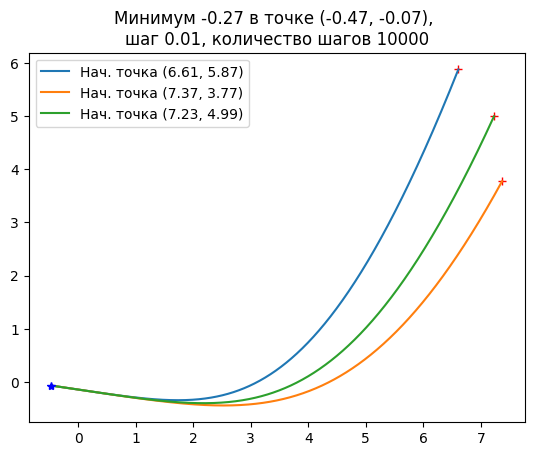

In [9]:
min_val = 0
min_dot = tuple()

for i, (x, y) in enumerate(dot2d_generator(num_dots=N_DOTS), start=1):
    dots_, res_ = grad_opt(f=f, grad_f=f_grad, x=x, y=y, step=STEP, iter=N_ITER)

    min_val = str(round(res_, 2))
    min_dot = round(float(dots_[-1, 0]), 2), round(float(dots_[-1, 1]), 2)

    logger.info("Искомая точка %s", (x, y))
    logger.info("Минимум %s", min_val)
    logger.info("Точка минимума %s", min_dot)

    plt.plot(x, y, "r+")
    plt.plot(dots_[:, 0], dots_[:, 1], label=f"Нач. точка {x, y}")

plt.title(
    f"Минимум {min_val} в точке {min_dot[0], min_dot[1]}, \n"
    f"шаг {STEP}, "
    f"количество шагов {N_ITER}"
)
plt.plot(min_dot[0], min_dot[1], "b*")
plt.legend()
plt.show()